# DataSet Description

The utilized data set is forest fire adopted from https://archive.ics.uci.edu/ml/datasets/Forest+Fires 

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import pipeline

## Load The Data

In [3]:
data =  pd.read_csv("forestfires.csv")

In [4]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
data.dtypes

X          int64
Y          int64
month      int64
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

# Data Exploration

In [6]:
data.describe()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Plot the Area

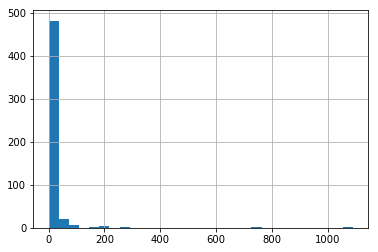

In [7]:
data["area"].hist(bins = 30)

## Log transform the result

In [8]:
data['logarea'] = np.log10(data.area+1)

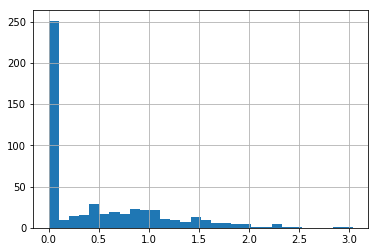

In [9]:
data["logarea"].hist(bins = 30)

## Q: What months has the most fires?

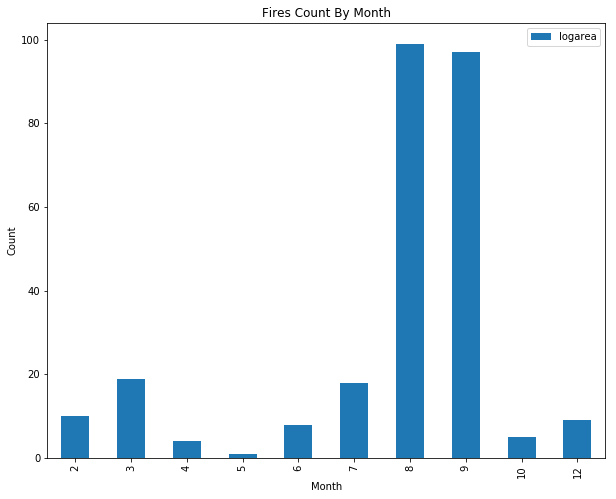

In [89]:
firedata = data[data['area'] != 0].copy()
countdata = firedata[['logarea','month']].groupby('month').count()
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title("Fires Count By Month")
countdata.plot.bar(ax = ax, y='logarea')
ax.set_xlabel("Month")
ax.set_ylabel("Count")
fig.savefig('FireByMonth.png', dpi=300, bbox_inches='tight', transparent=True)

### Does Day affect fire?

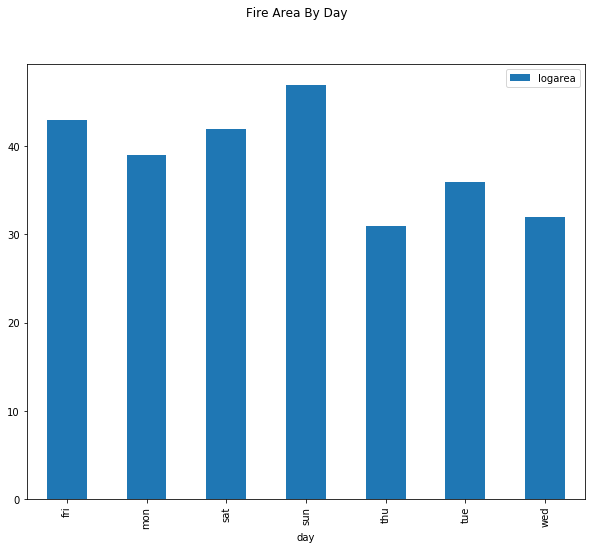

In [11]:
countdays = firedata[['logarea','day']].groupby('day').count()
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('Fire Area By Day')
countdays.plot.bar(ax = ax, y='logarea')

### Where most fires occure?

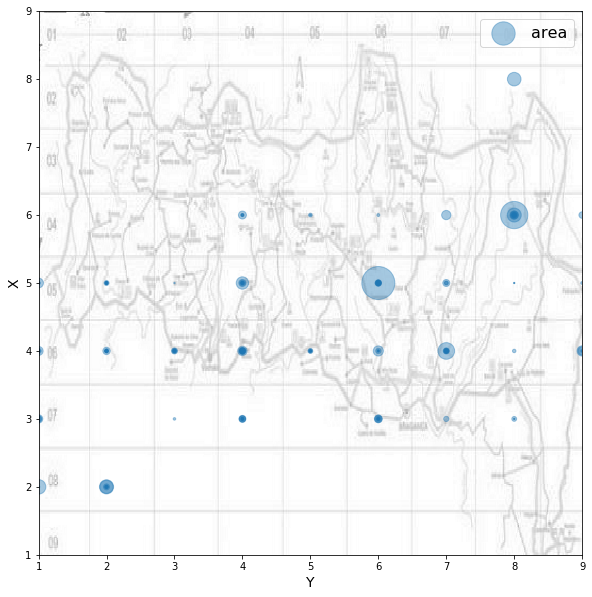

In [12]:
park_img=mpimg.imread('./park.png')
ax = data.plot(kind="scatter", x="X", y="Y", figsize=(10,10),
                       s=data['area'], label="area",
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(park_img, extent=[1, 9, 1, 9], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("X", fontsize=14)
plt.xlabel("Y", fontsize=14)

plt.legend(fontsize=16)
#save_fig("california_housing_prices_plot")
plt.show()

In [13]:
### Remove Unwanted Parameters (X,Y,day)

In [14]:
data.drop(data[["X","Y","day","area"]], axis=1) 

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,logarea
0,3,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
5,8,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.000000
6,8,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.000000
7,8,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.000000
8,9,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.000000
9,9,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.000000


In [90]:
corr_matrix = data.corr()

In [91]:
corr_matrix["logarea"].abs().sort_values(ascending=False)

logarea    1.000000
area       0.524134
month      0.114280
DMC        0.067153
wind       0.066973
DC         0.066360
X          0.061995
RH         0.053662
temp       0.053487
FFMC       0.046799
Y          0.038838
rain       0.023311
ISI        0.010347
Name: logarea, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266D0ECAB70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000266D3FC0EB8>]], dtype=object)

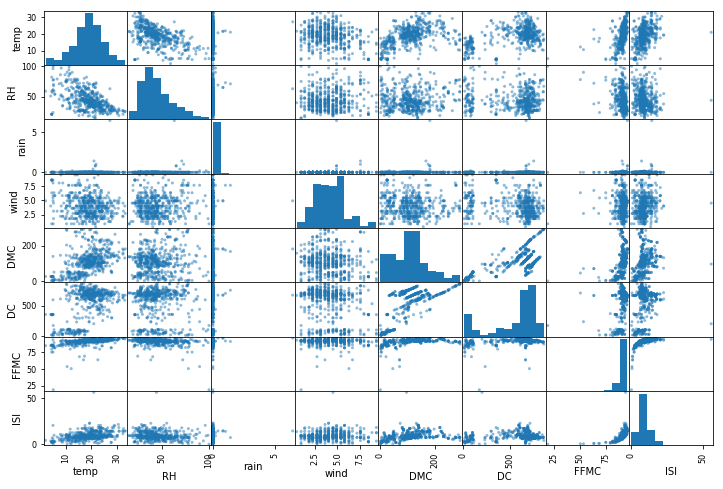

In [94]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["temp", "RH", "rain", "wind","DMC","DC","FFMC","ISI"]
scatter_matrix(data[attributes], figsize=(12, 8))

# Data Transformation

First the Y axis (logarea) is Sperated
Since the data is Both Categral and Numerical
the Numerical part is Scaled using Sklearn standard Scaler
The Categogoral part is encoded using OneHot Encoder

In [18]:
Y = data["logarea"].copy()

In [19]:
X_num = data[["FFMC","DMC","DC","ISI","temp","RH","wind","rain"]].copy()
scaler = StandardScaler()
X_num = pd.DataFrame(scaler.fit_transform(X_num),columns = X_num.columns)
X_num.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268


In [20]:
X_cat = data[["month"]].copy()
cat_features = X_cat.month.unique()
X_cat.shape
cat_features

array([ 3, 10,  8,  9,  4,  6,  7,  2,  1, 12,  5, 11], dtype=int64)

In [21]:
cat_encoder = OneHotEncoder(sparse = False)
X_cat = pd.DataFrame(cat_encoder.fit_transform(X_cat),columns = cat_features)
X_cat.head()

,3,10,8,9,4,6,7,2,1,12,5,11
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
X = pd.concat([X_num, X_cat], axis=1)

### Final Features

In [23]:
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,3,10,8,9,4,6,7,2,1,12,5,11
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: logarea, dtype: float64

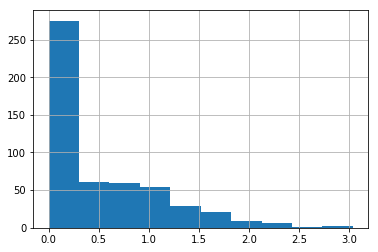

In [25]:
Y.hist()

# Learning Phase

## Compute Train across different Validation Sets and Test Accuracy

In [26]:
def getTrainTestRMSE(reg,Xtr,Ytr,Xte,Yte):
    reg.fit(Xtr, Ytr)
    trainpredictions = reg.predict(Xtr)
    tr_mse = mean_squared_error(Ytr, trainpredictions)
    tr_rmse = np.sqrt(tr_mse)
    testpre = reg.predict(Xte)
    te_mse = mean_squared_error(Yte, testpre)
    te_rmse = np.sqrt(te_mse)
    return [tr_rmse,te_rmse]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

### Linear Regression

In [28]:
lin_reg = LinearRegression()
getTrainTestRMSE(lin_reg,X_train, y_train,X_test, y_test)

[0.57647906780906666, 0.65073839480645279]

### Support Vector Machine (Linear Kernel)

In [29]:
svm_reg = SVR(kernel="linear")
getTrainTestRMSE(svm_reg,X_train, y_train,X_test, y_test)

[0.61244714262236721, 0.69570898717482976]

### Support Vector Machine (rbf Kernel)

In [30]:
svm_reg = SVR(kernel="rbf")
getTrainTestRMSE(svm_reg,X_train, y_train,X_test, y_test)

[0.5921421945752543, 0.67178979678138773]

### Random Forest Regressor

In [31]:
forest_reg = RandomForestRegressor(random_state=42)
getTrainTestRMSE(forest_reg,X_train, y_train,X_test, y_test)

[0.30073711557894228, 0.65481324762949911]

### Detecting the best Features with RandomForest

In [32]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [10,50,100], 'max_features': [5,10,15]},
  ]
forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12)*5=90 rounds of training 
forest_grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
forest_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 50, 100], 'max_features': [5, 10, 15]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [33]:
forest_grid_search.best_params_

{'max_features': 5, 'n_estimators': 100}

In [34]:
forest_grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=5, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [35]:
getTrainTestRMSE(forest_grid_search.best_estimator_,X_train, y_train,X_test, y_test)

[0.27070957169735999, 0.63808615571291449]

In [36]:
forest_feature_importances = forest_grid_search.best_estimator_.feature_importances_
forest_feature_importances

array([  1.02111041e-01,   1.29179660e-01,   1.12221741e-01,
         1.05068430e-01,   2.02853836e-01,   1.61055229e-01,
         1.17418799e-01,   3.14408784e-03,   1.73641280e-05,
         3.32503221e-03,   4.60250192e-03,   8.24580298e-04,
         6.98711472e-03,   4.91864534e-03,   6.84738855e-03,
         1.09146357e-02,   1.33014041e-02,   4.68522650e-03,
         1.43258101e-04,   1.03800246e-02])

In [95]:
pd.DataFrame(sorted(zip(forest_feature_importances, X_train.columns), reverse=True))

,0,1
0,0.202854,temp
1,0.161055,RH
2,0.129180,DMC
3,0.117419,wind
4,0.112222,DC
5,0.105068,ISI
6,0.102111,FFMC
7,0.013301,1
8,0.010915,2
9,0.010380,11


## Reducing Features

In [38]:
XR = X[["temp","RH","DMC","wind","DC"]]

In [39]:
XR_train, XR_test, y_train, y_test = train_test_split(XR, Y, test_size=0.2,random_state=42)

## Detecting best SVM Values

In [40]:
param_grid = [
        {'kernel': ['linear'], 'C': [10., 100., 1000.]},
        {'kernel': ['rbf'], 'C': [10., 100., 1000.0],
         'gamma': [0.01, 0.1, 1.0]},
    ]
svm_reg = SVR()
svm_grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
svm_grid_search.fit(XR_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   12.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   15.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear'], 'C': [10.0, 100.0, 1000.0]}, {'kernel': ['rbf'], 'C': [10.0, 100.0, 1000.0], 'gamma': [0.01, 0.1, 1.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=2)

In [41]:
svm_grid_search.best_params_

{'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}

In [42]:
svm_grid_search.best_estimator_

SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
getTrainTestRMSE(svm_grid_search.best_estimator_,XR_train, y_train,XR_test, y_test)

[0.6260545983083774, 0.67711526969516656]

### Detecting Best Value for linear Regression

In [44]:
#creating the model 
poly = preprocessing.PolynomialFeatures()
scaler = preprocessing.StandardScaler()
lin_reg2 = LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
getTrainTestRMSE(pipeline_reg,XR_train, y_train,XR_test, y_test)

[0.57798168327633781, 0.65065492137538739]

In [45]:
param_grid = [
        {'poly__degree': [1,2,3]},
        {'poly__include_bias':[False],'poly__degree': [1,2,3]}
    ]
linreg_grid_search = GridSearchCV(pipeline_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
linreg_grid_search.fit(XR_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    5.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('scal', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'poly__degree': [1, 2, 3]}, {'poly__include_bias': [False], 'poly__degree': [1, 2, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=2)

In [46]:
linreg_grid_search.best_params_

{'poly__degree': 1}

In [47]:
linreg_grid_search.best_estimator_

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('scal', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [48]:
getTrainTestRMSE(linreg_grid_search.best_estimator_,XR_train, y_train,XR_test, y_test)

[0.59323640765955954, 0.64099353391664171]

## Testing with Optimized Value

In [49]:
regressors = [linreg_grid_search.best_estimator_,
            forest_grid_search.best_estimator_,
              svm_grid_search.best_estimator_]

In [50]:
for r in regressors:
    print(r.__class__.__name__,"-",getTrainTestRMSE(r,XR_train, y_train,XR_test, y_test))

Pipeline - [0.59323640765955954, 0.64099353391664171]
RandomForestRegressor - [0.26689031561029658, 0.63476446789958896]
SVR - [0.6260545983083774, 0.67711526969516656]


In [101]:
A = np.array([1,2,3,4])
B = np.array([[1,2],[3,4]])
A + B

ValueError: operands could not be broadcast together with shapes (4,) (2,2) 

In [98]:
arr[0,1]

2